# P.MUTHULAKSHMI
# 215229124 

## ** Lab13: Image Classification using CNN for CIFAR-10 Dataset**

In this lab, you will work with the CIFAR-10 Dataset. This is a well-known dataset for image 
classification, which consists of 60000 32x32 color images in 10 classes, with 6000 images per class. 
There are 50000 training images and 10000 test images.


The 10 classes: Airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck

### 1. Import libraries

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import random
import numpy as np
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Load your data and print the shape of training and test samples

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170508288/170498071 [==============================] - 14s 0us/step
x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
50000 train samples
10000 test samples


### 3. Print the shape of one image (is it 32 x 32 x 3 numpy array ?)

In [3]:
x_train[444].shape

(32, 32, 3)

### 4. Display one image using imshow() function

[9]


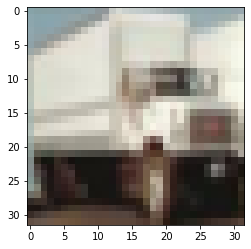

In [4]:
print(y_train[444])
plt.imshow(x_train[444])

### 5. Convert y_train and y_test into categorical values

In [5]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [6]:
class_names = ['airplane','car','bird','dog','cat','deer','frog','horse','ship','truck']

In [7]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

### 6. Convert train data into float and scale

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### 7. Build your first CNN

In [9]:
INPUT_SHAPE = (32,32,3)

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), strides=(2,2),activation='relu', padding='same', input_shape=INPUT_SHAPE))

model.add(Conv2D(filters=32, kernel_size=(5,5),strides=(2,2), activation='relu', padding='same', input_shape=INPUT_SHAPE))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dropout(rate=0.5))

model.add(Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 32)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 4, 4, 32)          0         
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                        

### 8. Print summary and verify your configuration

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 32)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 4, 4, 32)          0         
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                        

### 9. Compile and fit and validate your model with the following parameters

In [12]:
model.compile(optimizer=RMSprop(0.00005,1e-6),loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
history=model.fit(x_train,y_train,batch_size=32,epochs=15,verbose=2,validation_split=0.2,shuffle=True)

Epoch 1/15
1250/1250 - 16s - loss: 2.1439 - accuracy: 0.2050 - val_loss: 1.9409 - val_accuracy: 0.3246 - 16s/epoch - 13ms/step
Epoch 2/15
1250/1250 - 5s - loss: 1.9146 - accuracy: 0.3044 - val_loss: 1.8161 - val_accuracy: 0.3626 - 5s/epoch - 4ms/step
Epoch 3/15
1250/1250 - 6s - loss: 1.7961 - accuracy: 0.3514 - val_loss: 1.6903 - val_accuracy: 0.4049 - 6s/epoch - 4ms/step
Epoch 4/15
1250/1250 - 8s - loss: 1.7232 - accuracy: 0.3799 - val_loss: 1.6393 - val_accuracy: 0.4202 - 8s/epoch - 6ms/step
Epoch 5/15
1250/1250 - 7s - loss: 1.6750 - accuracy: 0.3951 - val_loss: 1.5850 - val_accuracy: 0.4394 - 7s/epoch - 6ms/step
Epoch 6/15
1250/1250 - 4s - loss: 1.6353 - accuracy: 0.4076 - val_loss: 1.5751 - val_accuracy: 0.4439 - 4s/epoch - 4ms/step
Epoch 7/15
1250/1250 - 5s - loss: 1.6031 - accuracy: 0.4203 - val_loss: 1.5293 - val_accuracy: 0.4558 - 5s/epoch - 4ms/step
Epoch 8/15
1250/1250 - 4s - loss: 1.5743 - accuracy: 0.4318 - val_loss: 1.5061 - val_accuracy: 0.4638 - 4s/epoch - 4ms/step
Epoch

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.3722478151321411
Test accuracy: 0.5141000151634216


### 10. Exercise

#### 1. Build a more complicated model with the following pattern: Conv -> Conv-> MaxPool -> Conv-> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

#### 2. Use strides of 1 for all convolutional layers.

#### 3. How many parameters does your model have? How does that compare to the previous model?

#### 4. Train it for 5 epochs. What do you notice about the training time, loss and accuracy numbers (on both the training and validation sets)?

#### 5. Try different structures and run times, and see how accurate your model can be.


# Model1

In [15]:
INPUT_SHAPE = (32,32,3)

model1 = Sequential()

model1.add(Conv2D(filters=64, kernel_size=(5,5), strides=(1,1),activation='relu', padding='same', input_shape=INPUT_SHAPE))

model1.add(Conv2D(filters=32, kernel_size=(4,4),strides=(1,1), activation='relu', padding='same', input_shape=INPUT_SHAPE))

model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Flatten())

model1.add(Dense(512, activation='relu'))
model1.add(Dense(256, activation='relu'))

model1.add(Dense(10, activation='softmax'))

In [16]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        4864      
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        32800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               4194816   
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                      

In [17]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
history1=model1.fit(x_train,y_train,batch_size=16,epochs=15,verbose=2,validation_split=0.2,shuffle=True)

Epoch 1/15
2500/2500 - 14s - loss: 1.5646 - accuracy: 0.4298 - val_loss: 1.2965 - val_accuracy: 0.5330 - 14s/epoch - 6ms/step
Epoch 2/15
2500/2500 - 12s - loss: 1.1604 - accuracy: 0.5865 - val_loss: 1.1509 - val_accuracy: 0.5914 - 12s/epoch - 5ms/step
Epoch 3/15
2500/2500 - 13s - loss: 0.9133 - accuracy: 0.6773 - val_loss: 1.1050 - val_accuracy: 0.6130 - 13s/epoch - 5ms/step
Epoch 4/15
2500/2500 - 12s - loss: 0.6705 - accuracy: 0.7637 - val_loss: 1.1144 - val_accuracy: 0.6407 - 12s/epoch - 5ms/step
Epoch 5/15
2500/2500 - 11s - loss: 0.4609 - accuracy: 0.8377 - val_loss: 1.4023 - val_accuracy: 0.6244 - 11s/epoch - 5ms/step
Epoch 6/15
2500/2500 - 13s - loss: 0.3111 - accuracy: 0.8900 - val_loss: 1.5919 - val_accuracy: 0.6221 - 13s/epoch - 5ms/step
Epoch 7/15
2500/2500 - 11s - loss: 0.2162 - accuracy: 0.9236 - val_loss: 1.8788 - val_accuracy: 0.6238 - 11s/epoch - 5ms/step
Epoch 8/15
2500/2500 - 13s - loss: 0.1802 - accuracy: 0.9391 - val_loss: 2.1947 - val_accuracy: 0.6179 - 13s/epoch - 5

In [19]:
score = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 3.3476402759552
Test accuracy: 0.6014999747276306


 # Model2

In [21]:
import tensorflow as tf

In [22]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(32,32,3)))
model2.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model2.add(MaxPooling2D())
model2.add(Dropout(0.2))

model2.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model2.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model2.add(MaxPooling2D())
model2.add(Dropout(0.3))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['accuracy'])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [23]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
history2 = model2.fit(x_train,y_train,epochs=10,verbose=1)

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5696 - accuracy: 0.4287
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1651 - accuracy: 0.5863
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0071 - accuracy: 0.6467
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9109 - accuracy: 0.6796
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8527 - accuracy: 0.7009
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8033 - accuracy: 0.7178
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7638 - accuracy: 0.7312
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7324 - accuracy: 0.7427
Epoch 9/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7070 - accuracy: 0.7519
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.671

In [25]:
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6587533354759216
Test accuracy: 0.7710000276565552


 # Model3

In [26]:
import tensorflow as tf

In [27]:
model3 = Sequential()
model3.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(32,32,3)))
model3.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model3.add(MaxPooling2D())
model3.add(Dropout(0.2))

model3.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model3.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model3.add(MaxPooling2D())
model3.add(Dropout(0.3))

model3.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model3.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model3.add(MaxPooling2D())
model3.add(Dropout(0.4))

model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.4))
model3.add(Dense(10, activation='softmax'))

model3.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['accuracy'])
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [28]:
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
history3 = model3.fit(x_train,y_train,epochs=10,verbose=1)

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7546 - accuracy: 0.3483
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3486 - accuracy: 0.5173
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1750 - accuracy: 0.5829
Epoch 4/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.0754 - accuracy: 0.6232
Epoch 5/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.0087 - accuracy: 0.6494
Epoch 6/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.9499 - accuracy: 0.6700
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9079 - accuracy: 0.6850
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8708 - accuracy: 0.6974
Epoch 9/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.8494 - accuracy: 0.7052
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.82

In [30]:
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7365416288375854
Test accuracy: 0.742900013923645


 # Model4

In [31]:
model4 = Sequential()
model4.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(32,32,3)))
model4.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model4.add(MaxPooling2D())
model4.add(Dropout(0.2))

model4.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model4.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model4.add(MaxPooling2D())
model4.add(Dropout(0.3))

model4.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model4.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model4.add(MaxPooling2D())
model4.add(Dropout(0.4))

model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.4))
model4.add(Dense(10, activation='softmax'))

model4.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['accuracy'])
model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [32]:
model4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:

history4 = model4.fit(x_train,y_train,epochs=30,verbose=1)

Epoch 1/30
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6885 - accuracy: 0.3747
Epoch 2/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2777 - accuracy: 0.5403
Epoch 3/30
1563/1563 [==============================] - 9s 5ms/step - loss: 1.1092 - accuracy: 0.6084
Epoch 4/30
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0060 - accuracy: 0.6480
Epoch 5/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9503 - accuracy: 0.6652
Epoch 6/30
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9042 - accuracy: 0.6842
Epoch 7/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8653 - accuracy: 0.7011
Epoch 8/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8315 - accuracy: 0.7083
Epoch 9/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8089 - accuracy: 0.7202
Epoch 10/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7

In [34]:
score = model4.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6826088428497314
Test accuracy: 0.7786999940872192
